**Importing Libraries**

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

**In this notebook i am going to explore iris dataset with following features**
- **SepalLengthCm : Sepal length in CM**
- **SepalWidthCm  : Sepal Width in CM**
- **PetalLengthCm : Petal length in CM**
- **PetalWidthCm  : Petal Width in CM**

**Each row represents a flower in this dataset, <font color='green'>The goal of this notebook is to predict the species of flower based on above features**<font>

In [6]:
#dropping unrelevant column
data.drop(['Id'],axis=1,inplace=True)

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## EDA

### Sepal Length VS Sepal Width

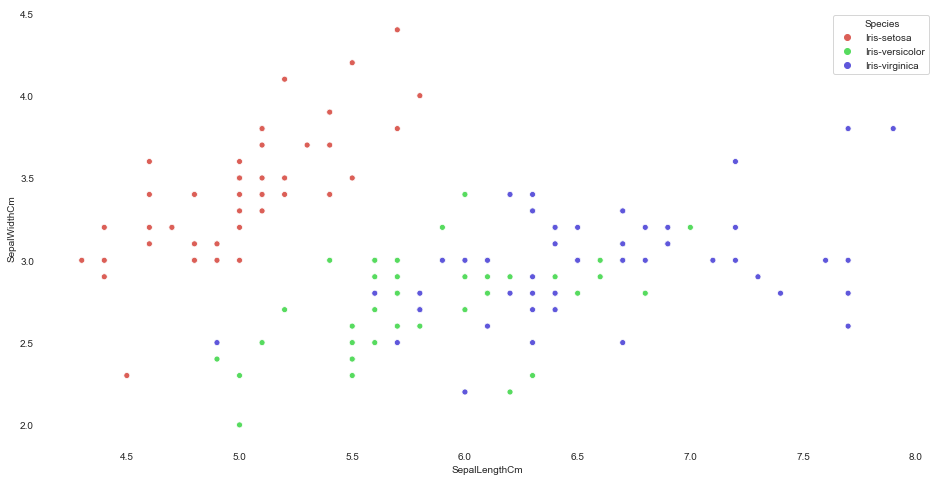

In [15]:
sns.set_style('white',{'xtick.bottom': False,'ytick.left': False})
fig,ax = plt.subplots(figsize=(16,8))
sns.scatterplot('SepalLengthCm','SepalWidthCm',data=data,hue='Species',palette='hls')
sns.despine(left=True,bottom=True)

### Petal Length VS Petal Width

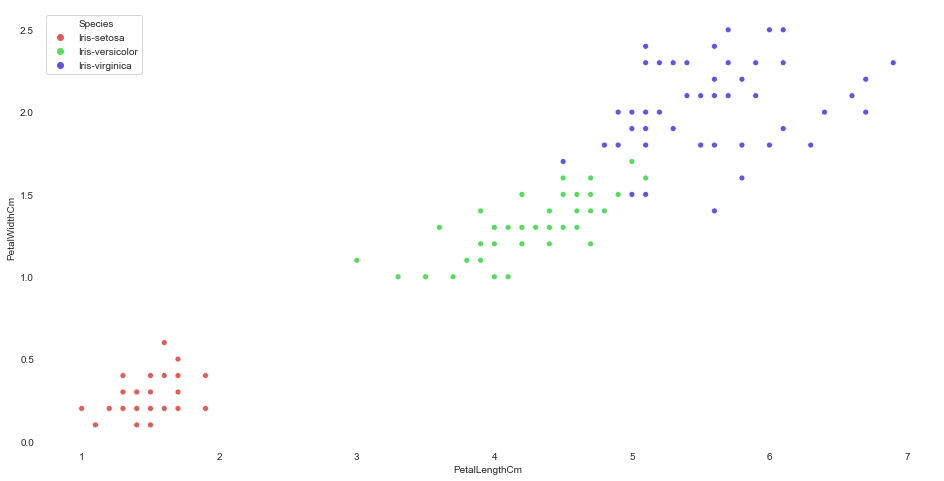

In [16]:
sns.set_style('white',{'xtick.bottom': False,'ytick.left': False})
fig,ax = plt.subplots(figsize=(16,8))
sns.scatterplot('PetalLengthCm','PetalWidthCm',data=data,hue='Species',palette='hls')
sns.despine(left=True,bottom=True)

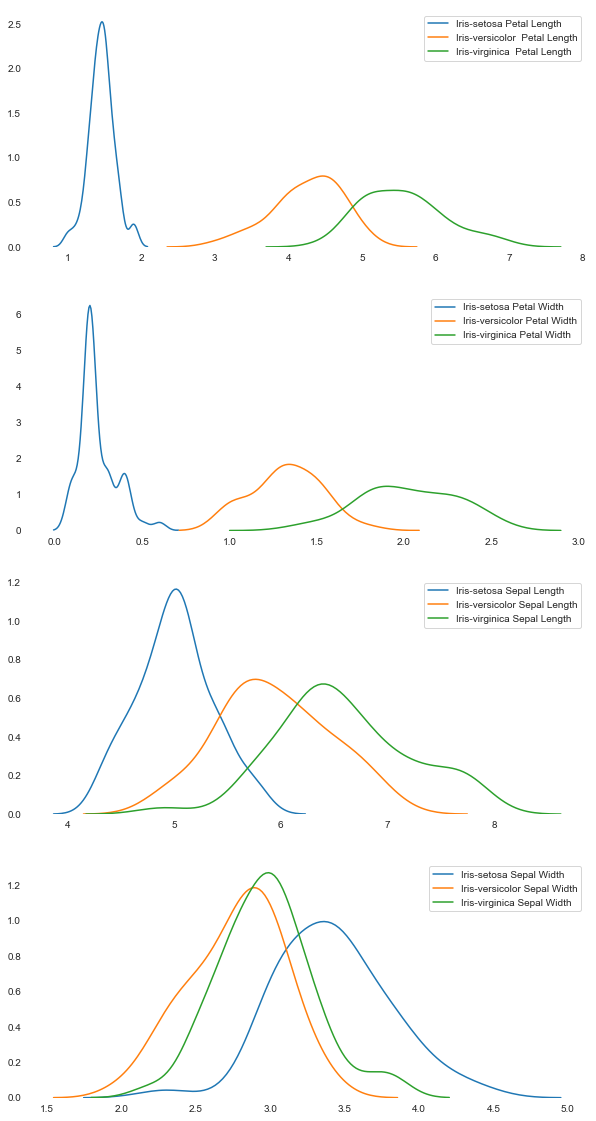

In [74]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize=(10,20))
sns.despine(left=True,bottom=True)
sns.kdeplot(data[data['Species'] == 'Iris-setosa'].PetalLengthCm,ax=ax1,label='Iris-setosa Petal Length')
sns.kdeplot(data[data['Species'] == 'Iris-versicolor'].PetalLengthCm,ax=ax1,label='Iris-versicolor  Petal Length')
sns.kdeplot(data[data['Species'] == 'Iris-virginica'].PetalLengthCm,ax=ax1,label='Iris-virginica  Petal Length')
sns.kdeplot(data[data['Species'] == 'Iris-setosa'].PetalWidthCm,ax=ax2,label='Iris-setosa Petal Width')
sns.kdeplot(data[data['Species'] == 'Iris-versicolor'].PetalWidthCm,ax=ax2,label='Iris-versicolor Petal Width')
sns.kdeplot(data[data['Species'] == 'Iris-virginica'].PetalWidthCm,ax=ax2,label='Iris-virginica Petal Width')
sns.kdeplot(data[data['Species'] == 'Iris-setosa'].SepalLengthCm,ax=ax3,label='Iris-setosa Sepal Length')
sns.kdeplot(data[data['Species'] == 'Iris-versicolor'].SepalLengthCm,ax=ax3,label='Iris-versicolor Sepal Length')
sns.kdeplot(data[data['Species'] == 'Iris-virginica'].SepalLengthCm,ax=ax3,label='Iris-virginica Sepal Length')
sns.kdeplot(data[data['Species'] == 'Iris-setosa'].SepalWidthCm,ax=ax4,label='Iris-setosa Sepal Width')
sns.kdeplot(data[data['Species'] == 'Iris-versicolor'].SepalWidthCm,ax=ax4,label='Iris-versicolor Sepal Width')
sns.kdeplot(data[data['Species'] == 'Iris-virginica'].SepalWidthCm,ax=ax4,label='Iris-virginica Sepal Width')

C:\Users\WIN7\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


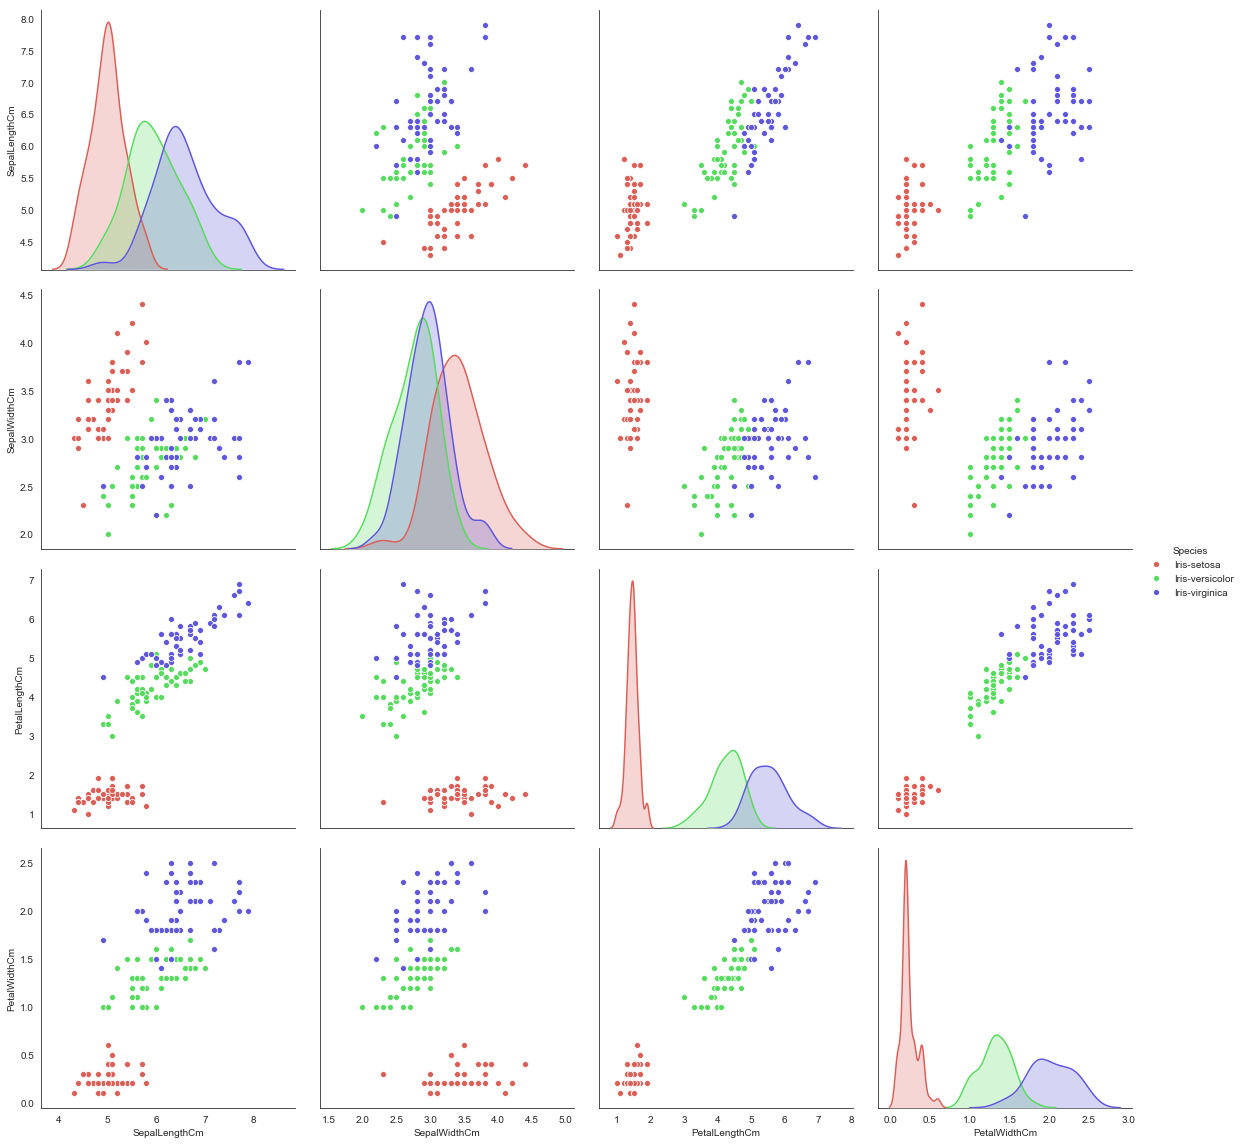

In [61]:
sns.pairplot(data,hue='Species',palette='hls',height=4,aspect=1)

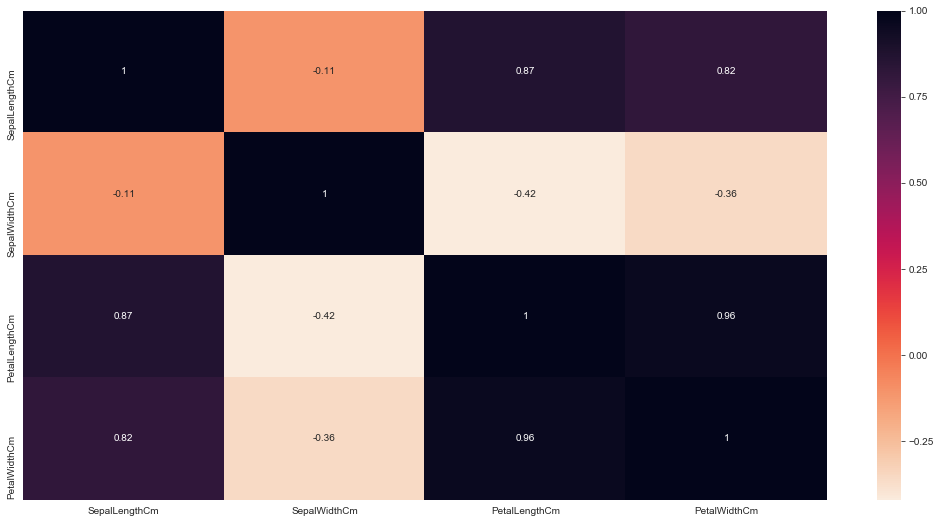

In [81]:
fig,ax = plt.subplots(figsize=(18,9))
sns.heatmap(data.drop(['Species'],axis=1).corr(),annot=True,cmap=sns.cm.rocket_r,ax=ax)

**Sepal Width is the least correlated lets fit the models with and with out spetal width and see which one has best accuracy**

In [124]:
lc = LabelEncoder()
data.Species = lc.fit_transform(data.Species)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Dropping the Sepal Width Feature which has least collinearity**

## Classification

### Logistic regression

In [143]:
x = data.drop(['SepalWidthCm','Species'],axis=1)
y = data['Species']

In [144]:
#Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [145]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)
yt_pred = log_reg.predict(x_train)

print('Test Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
print('Train Accuracy Score {}'.format(accuracy_score(y_train,yt_pred)))

cm = confusion_matrix(y_test,y_pred)
cm

Test Accuracy Score 0.8333333333333334
Train Accuracy Score 0.9583333333333334


C:\Users\WIN7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\WIN7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[11,  0,  0],
       [ 0,  8,  5],
       [ 0,  0,  6]], dtype=int64)

## SVC

In [152]:
svc =SVC()
svc.fit(xw_train,y_train)
y_pred = svc.predict(x_test)
yt_pred = svc.predict(x_train)

print('Test Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
print('Train Accuracy Score {}'.format(accuracy_score(y_train,yt_pred)))

cm = confusion_matrix(y_test,y_pred)
cm

Test Accuracy Score 0.9666666666666667
Train Accuracy Score 0.9833333333333333


C:\Users\WIN7\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

## K-NN

In [153]:
knn = KNeighborsClassifier()
knn.fit(xw_train,y_train)
y_pred = knn.predict(x_test)
yt_pred = knn.predict(x_train)

print('Test Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
print('Train Accuracy Score {}'.format(accuracy_score(y_train,yt_pred)))

cm = confusion_matrix(y_test,y_pred)
cm

Test Accuracy Score 1.0
Train Accuracy Score 0.9583333333333334


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

## Random Forest

In [154]:
rvc = RandomForestClassifier()
rvc.fit(xw_train,y_train)
y_pred = rvc.predict(x_test)
yt_pred = rvc.predict(x_train)

print('Test Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
print('Train Accuracy Score {}'.format(accuracy_score(y_train,yt_pred)))

cm = confusion_matrix(y_test,y_pred)
cm

Test Accuracy Score 0.9666666666666667
Train Accuracy Score 1.0


C:\Users\WIN7\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)